In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier as RFC # 랜덤포레스트 분류 알고리즘
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 1. 데이터 가져오기

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/슬기로운 건강생활/data(over_dis_vs_nor).csv', encoding='cp949')
df

,SEX,BTH_G,SBP,DBP,FBS,BMI,DIS,Dis
0,0,1,90,50,86,20.1,2,1
1,0,1,120,80,90,27.0,3,1
2,0,1,100,60,112,31.8,2,1
3,0,1,170,120,86,23.3,2,1
4,0,1,135,80,104,35.0,2,1
...,...,...,...,...,...,...,...,...
1481319,1,21,130,90,185,26.3,3,1
1481320,1,18,140,100,120,28.8,2,1
1481321,0,12,100,60,101,23.0,3,1
1481322,1,20,134,72,168,23.1,3,1


In [ ]:
# 1번 모델 정답 지우기
train=df.drop(['Dis'], axis=1)

In [ ]:
# 2번 모델 정답 중 '4' 모두 지우기
train = train.loc[train['DIS']!=4]
train.head()

,SEX,BTH_G,SBP,DBP,FBS,BMI,DIS
0,0,1,90,50,86,20.1,2
1,0,1,120,80,90,27.0,3
2,0,1,100,60,112,31.8,2
3,0,1,170,120,86,23.3,2
4,0,1,135,80,104,35.0,2


# 2. 데이터 전처리

In [ ]:
# target 설정
# train, test 나누기
yt = train['DIS']
xt = train.drop(['DIS'], axis=1)

# 데이터 정규화
# 표준 스케일러(평균 0, 분산 1)
scaler = MinMaxScaler()
xt = scaler.fit_transform(xt)

# train, test 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(xt, yt, test_size=0.5, random_state=42)

# 3. 기본 모델 구성
- 하이퍼파라미터 튜닝x

In [ ]:
def modeling_uncustomized (algorithm, x_train, y_train, x_test, y_test):
    # 하이퍼파라미터 조정 없이 모델 학습
    uncustomized = algorithm(random_state=1234, oob_score)
    uncustomized.fit(x_train, y_train)
    # Train Data 설명력
    train_score_before = uncustomized.score(x_train, y_train).round(3)
    print(f"학습 데이터셋 정확도: {train_score_before}")
    # Test Data 설명력
    test_score_before = uncustomized.score(x_test, y_test).round(3)
    print(f"테스트 데이터셋 정확도: {test_score_before}")
    return train_score_before, test_score_before

# 4. 하이퍼파라미터별 모델 성능 시각화
- x축 : 하이퍼파라미터 값
- y축 : 학습 및 테스트 데이터

In [ ]:
def optimi_visualization(algorithm_name, x_values, train_score, test_score, xlabel, filename):
    # 하이퍼파라미터 조정에 따른 학습 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, train_score, linestyle = '-', label = 'train score')
    # 하이퍼파라미터 조정에 따른 테스트 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, test_score, linestyle = '--', label = 'test score')
    plt.ylabel('Accuracy(%)') # y축 라벨
    plt.xlabel(xlabel) # x축 라벨
    plt.legend() # 범례표시
    plt.savefig('../figure/' + algorithm_name + '_' + filename + '.png') # 시각화한 그래프는 로컬에 저장

# 5. 모델 최적화 함수
## (1) 학습 트리 개수 선정

In [ ]:
def optimi_estimator(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_estimator_min, n_estimator_max):
    train_score = []; test_score =[]
    para_n_tree = [n_tree*5 for n_tree in range(n_estimator_min, n_estimator_max)]

    for v_n_estimators in para_n_tree:
        model = algorithm(n_estimators = v_n_estimators, random_state=1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 트리 개수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'n_estimators': para_n_tree, 'TrainScore': train_score, 'TestScore': test_score})
    # 트리 개수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_n_tree, train_score, test_score, "The number of estimator", "n_estimator")
    print(round(df_score_n, 4))

In [ ]:
print("n_estimators : C:{}, TrainScore:{:2f}, TestScore:{:2f}".format
          (para_n_tree,train_score,test_score))

NameError: ignored

In [ ]:
df_score_n

NameError: ignored

In [ ]:
print("TrainScore:{:2f}, TestScore:{:2f}".format
          (train_score,test_score))

NameError: ignored

## (2) 최대 깊이 선정

In [ ]:
def optimi_maxdepth (algorithm, algorithm_name, x_train, y_train, x_test, y_test, depth_min, depth_max, n_estimator):
    train_score = []; test_score = []
    para_depth = [depth for depth in range(depth_min, depth_max)]

    for v_max_depth in para_depth:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(max_depth = v_max_depth,
                              random_state=1234)
        else:
            model = algorithm(max_depth = v_max_depth,
                              n_estimators = n_estimator,
                              random_state=1234)
        
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 최대 깊이에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'depth': para_depth, 'TrainScore': train_score, 'TestScore': test_score})
    # 최대 깊이에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_depth, train_score, test_score, "The number of depth", "n_depth")
    print(round(df_score_n, 4))

In [ ]:
def model_final(algorithm, algorithm_name, feature_name, x_train, y_train, x_test, y_test, n_estimator, n_depth, n_split, n_leaf):
    # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
    if algorithm == DTC:
        model = algorithm(random_state=1234, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    else:
        model = algorithm(random_state = 1234, 
                          n_estimators = n_estimator, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    # 모델 학습
    model.fit(x_train, y_train)
    # 모델 저장
    model_path = '../model/'
    model_filename = 'wine_classification_' + algorithm_name + '.pkl'
    with open(model_path + model_filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"최종 모델 저장 완료! 파일 경로: {model_path + model_filename}\n")
    
    # 최종 모델의 성능 평가
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    y_pred = model.predict(x_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # 정확도
    print(f"Precision: {precision_score(y_test, y_pred):.3f}") # 정밀도
    print(f"Recall: {recall_score(y_test, y_pred):.3f}") # 재현율
    print(f"F1-score: {f1_score(y_test, y_pred):.3f}") # F1 스코어
    
    # 혼동행렬 시각화
    plt.figure(figsize =(30, 30))
    plot_confusion_matrix(model, 
                         x_test, y_test,
                         include_values = True,
                         display_labels = ['Red', 'White'], # 목표변수 이름
                         cmap = 'Pastel1') # 컬러맵
    plt.savefig('../figure/' + algorithm_name + '_confusion_matrix.png') # 혼동행렬 자료 저장
    plt.show()
    
    # 변수 중요도 산출
    dt_importance = pd.DataFrame()
    dt_importance['Feature'] = feature_name # 설명변수 이름
    dt_importance['Importance'] = model.feature_importances_ # 설명변수 중요도 산출

    # 변수 중요도 내림차순 정렬
    dt_importance.sort_values("Importance", ascending = False, inplace = True)
    print(dt_importance.round(3))
    # 변수 중요도 오름차순 정렬
    dt_importance.sort_values("Importance", ascending = True, inplace = True)
    # 변수 중요도 시각화
    coordinates = range(len(dt_importance)) # 설명변수 개수만큼 bar 시각화
    plt.barh(y = coordinates, width = dt_importance["Importance"])
    plt.yticks(coordinates, dt_importance["Feature"]) # y축 눈금별 설명변수 이름 기입
    plt.xlabel("Feature Importance") # x축 이름
    plt.ylabel("Features") # y축 이름
    plt.savefig('../figure/' + algorithm_name + '_feature_importance.png') # 변수 중요도 그래프 저장

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
print(confusion_ma)

In [ ]:
plot_feature_importances_cancer(model)

NameError: ignored

In [ ]:

import tensorflow as tf
import matplotlib.pyplot as plt


# 1. MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0

# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 훈련
history = model.fit(x_train, y_train, validation_split=0.25, epochs=10, verbose=1)
print(history.history)

# 6 훈련 과정 시각화 (정확도)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7 훈련 과정 시각화 (손실)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 기본 모델 학습

In [ ]:
# 랜덤포레스트 분류 알고리즘
algorithm = RFC
algorithm_name = 'rfc'

In [ ]:
train_acc_before, test_acc_before = modeling_uncustomized(algorithm, 
                                                          x_train,
                                                          y_train,
                                                          x_test,
                                                          y_test)

학습 데이터셋 정확도: 0.999
테스트 데이터셋 정확도: 0.915


In [ ]:
DIS=[1,2,3]

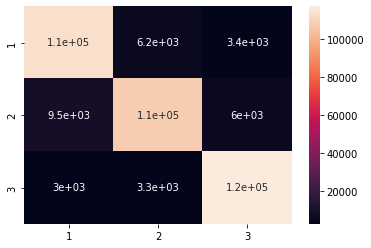

In [ ]:
import seaborn as sns

cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=DIS, index=DIS)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

plot = plot_confusion_matrix(RFC, # 분류 모델
                             x_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=DIS, # 표에 표시할 labels
                             cmap=plt.cm.Blue, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

AttributeError: ignored

## 모델 최적화: (1) 학습할 트리 개수 선정

FileNotFoundError: ignored

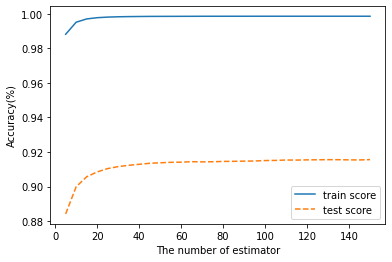

In [ ]:
n_estimator_min = 1
n_estimator_max = 31
optimi_estimator(algorithm, algorithm_name, 
                 x_train, y_train, x_test, y_test, 
                 n_estimator_min, n_estimator_max)

# Reference
1. [훈련 과정 시각화](https://codetorial.net/tensorflow/visualize_training_history.html)
2. [각 파라미터 최적화 값 찾기](https://heytech.tistory.com/149#%EB%AA%A-%EB%-D%B-%C-%A-%EC%B-%-C%EC%A-%--%ED%--%--%C-%A-%ED%--%A-%EC%--%--%-A%C-%A-%ED%--%--%EC%-A%B-%ED%--%A-%C-%A-%ED%-A%B-%EB%A-%AC%C-%A-%EB%AA%A-%EB%-D%B-%C-%A-%EA%B-%-C%EC%--%--%C-%A-%EC%--%A-%EC%A-%--)